In [1]:
import numpy as np
import qutip
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from matplotlib import ticker
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.rcParams.update({'font.size': 20, 'font.family': 'serif'})
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 2

def load_data(path_to_file):

    """ This function load the data for the plot.
    'path_to_file' is set such that it starts from 'results/data' """
    data = np.load(f'results/data/{path_to_file}')
    return data

In [2]:
data = np.load('results/data/back_action/' \
'x/Qinp/QRC/qubit/L9_Js1_h3_W0.01_dt5_V10_D1_Nrep1_MeasStr_0.1' \
'/Iter_0.npz', allow_pickle=True)

In [3]:
data['obs'].shape

(4000, 450)

In [32]:
import qutip

def plot_single_axis_dependence(L=9, h=10, W=0.01, Vmp=1, Dmp=1, N_rep=1, dt=10, Js=1, inp_type='qubit', legend=True, N_meas=None, MeasStr=0.1):
	fig, axes = plt.subplots(1, 1, figsize=(12, 6), sharey=True)  # 1 row, 3 cols
	dict ={
	'z': qutip.sigmaz(),
	'x': qutip.sigmax(),
	'y': qutip.sigmay(),
	}
	colors = ['chocolate', 'midnightblue', 'mediumvioletred']

	if N_meas is None:
		N_meas = 'Inf'

	for axis1 in ['x']:
		ax = axes

		path = f'back_action/x/Qinp/QPreprocess/{inp_type}/N_meas{N_meas}/Capacity_L{L}_Js{Js}_V{Vmp}_D{Dmp}_Nrep{N_rep}_h{h}_W{W}_dt{dt}_ax_{axis1}_sweep_delay_MeasStr{MeasStr}.npz'
		data = load_data(path)

		delays = data['delays']
		
		for idx2,axis2 in enumerate(['x', 'y', 'z']):
			C_mean = data[f'C_mean {axis2}']
			C_std = data[f'C_std {axis2}']

			ax.plot(delays, C_mean, marker='o', markersize=12, label=fr'$\langle \sigma_1^{{{axis2}}} \rangle$', color=colors[idx2])
			ax.fill_between(delays, C_mean - C_std, C_mean + C_std, alpha=0.2, color=colors[idx2])

		ax.set_title(f"{axis1}-axis measurement")
		ax.set_xlabel(r'$\tau_{{QRC}}$')

	axes.set_ylabel('C')
	if legend:
		axes.legend(fontsize=16, frameon=False)

	plt.tight_layout()
	plt.show()

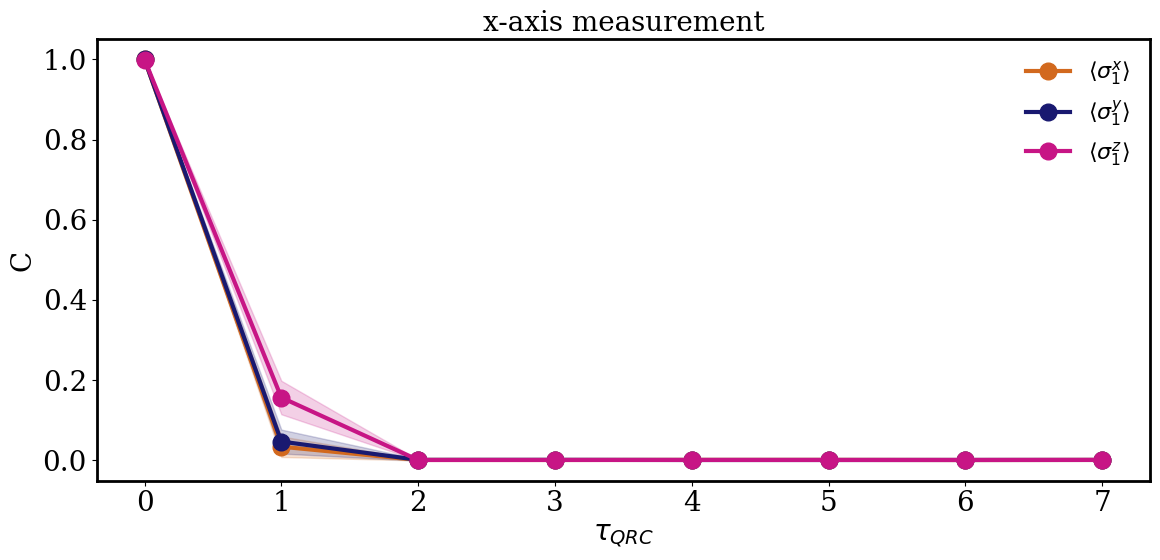

In [46]:
plot_single_axis_dependence(L=9, h=3, W=0.01, Vmp=10, Dmp=1, N_rep=1, dt=5, Js=1, legend=True, N_meas=int(1e6), MeasStr=1)